In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [2]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [3]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [4]:
df[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df['h'].str.split('\t',expand=True)

In [5]:
df.head()

,h,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,...,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2....,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,65,aver,292,7,2,7,11,32,...,27,2,15,1,2,28,3,6,68,
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2....,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,55,aver,282,4,1,7,13,31,...,28,5,16,0,1,30,1,7,72,
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2....,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,60,aver,274,8,3,5,12,27,...,31,7,13,1,2,28,2,10,75,
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2....,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,60,aver,243,2,1,8,12,31,...,31,2,15,0,0,30,2,8,67,
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2....,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,55,aver,361,7,3,7,18,35,...,42,6,19,0,2,46,3,8,102,


In [6]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [7]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,292,7,2,7,11,32,29,3,...,23,27,2,15,1,2,28,3,6,68
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,282,4,1,7,13,31,30,1,...,23,28,5,16,0,1,30,1,7,72
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,274,8,3,5,12,27,27,0,...,23,31,7,13,1,2,28,2,10,75
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,243,2,1,8,12,31,31,0,...,19,31,2,15,0,0,30,2,8,67
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,361,7,3,7,18,35,35,0,...,35,42,6,19,0,2,46,3,8,102


In [8]:
len(df[df.grade2 == 'aver'])

924

In [9]:
len(df[df.grade2 == 'best'])

93

In [10]:
len(df[df.grade2 == 'worst'])

45

In [11]:
df.shape

(1062, 21)

In [12]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [13]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,292,7,2,7,11,32,29,3,...,2,15,1,2,28,3,6,68,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,282,4,1,7,13,31,30,1,...,5,16,0,1,30,1,7,72,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,274,8,3,5,12,27,27,0,...,7,13,1,2,28,2,10,75,nonworst,nonbest
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,243,2,1,8,12,31,31,0,...,2,15,0,0,30,2,8,67,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,361,7,3,7,18,35,35,0,...,6,19,0,2,46,3,8,102,nonworst,nonbest


In [14]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)

In [15]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
0,292,7,2,7,11,32,29,3,10,23,27,2,15,1,2,28,3,6,68,nonbest
1,282,4,1,7,13,31,30,1,9,23,28,5,16,0,1,30,1,7,72,nonbest
2,274,8,3,5,12,27,27,0,11,23,31,7,13,1,2,28,2,10,75,nonbest
3,243,2,1,8,12,31,31,0,3,19,31,2,15,0,0,30,2,8,67,nonbest
4,361,7,3,7,18,35,35,0,9,35,42,6,19,0,2,46,3,8,102,nonbest


In [16]:
df_best_non.shape

(1062, 20)

In [17]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [18]:
y

array(['nonbest', 'nonbest', 'nonbest', ..., 'nonbest', 'nonbest',
       'nonbest'], dtype=object)

In [19]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

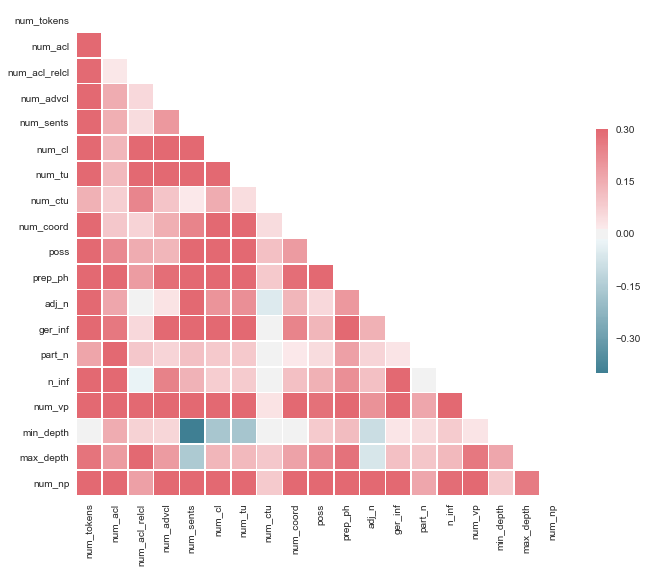

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

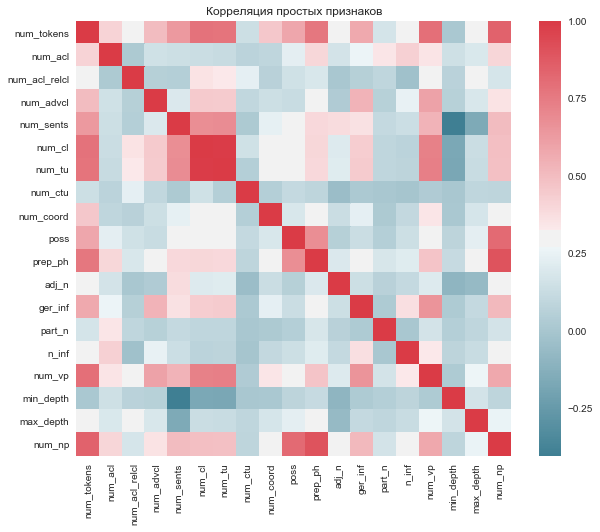

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция простых признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_simple.png')

# Разделение на тестовую и тренировочную выборку

In [22]:
from sklearn.model_selection import StratifiedKFold

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 850 essays ) TEST ( 212 essays )
TRAIN ( 851 essays ) TEST ( 211 essays )


# Дерево решений

In [24]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
y_pred = clf1.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.07      0.11      0.09        18
    nonbest       0.91      0.87      0.89       193

avg / total       0.84      0.80      0.82       211



In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

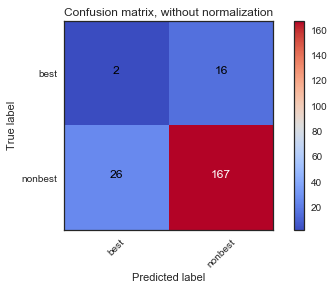

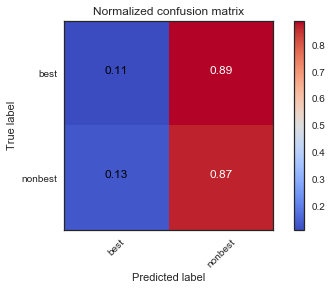

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [29]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.8


# Дерево решений с выбором лучших гиперпараметров

In [30]:
X_df_best_non.shape[1]

19

In [31]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
y_pred = clf1.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.12      0.11      0.12        18
    nonbest       0.92      0.93      0.92       193

avg / total       0.85      0.86      0.85       211



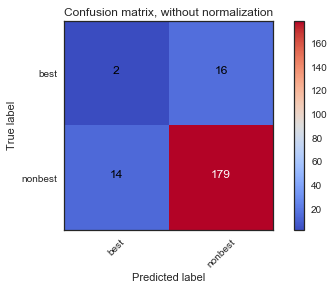

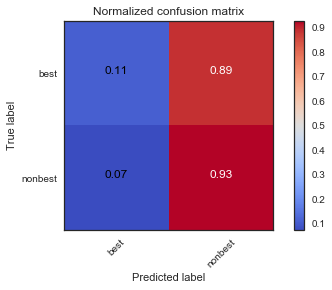

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [35]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.86


In [36]:
import collections

Feature ranking:
    importance   name_feature
0     0.184685     num_tokens
12    0.157085        ger_inf
10    0.118787        prep_ph
5     0.089110         num_cl
4     0.059312      num_sents
15    0.056571         num_vp
2     0.046665  num_acl_relcl
3     0.040736      num_advcl
18    0.038602         num_np
11    0.031565          adj_n
7     0.029733        num_ctu
14    0.029685          n_inf
6     0.022435         num_tu
9     0.022376           poss
13    0.022136         part_n
8     0.017175      num_coord
17    0.016889      max_depth
16    0.009458      min_depth
1     0.006993        num_acl


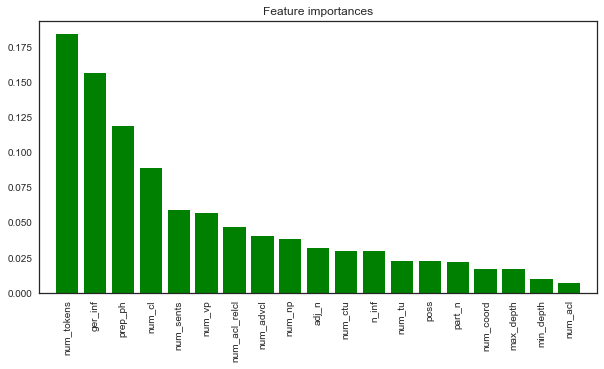

In [37]:
imp(clf1, X_df_best_non.columns)

In [38]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=28, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [39]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('/Users/irene/Desktop/Курсовая/graphs/decision_tree1000_2.png')

True

# RandomForestClassifier

In [40]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred = clf2.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.43      0.17      0.24        18
    nonbest       0.93      0.98      0.95       193

avg / total       0.88      0.91      0.89       211



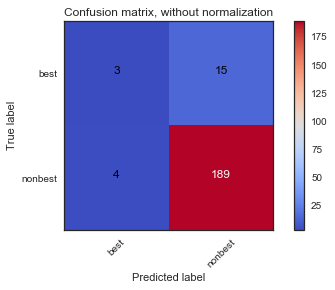

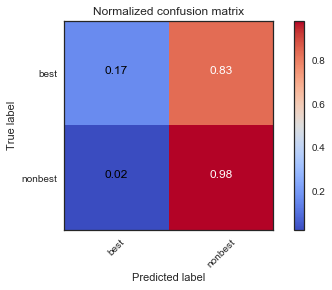

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [44]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.91


# RandomForestClassifier с выбором лучших гиперпараметров

In [45]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

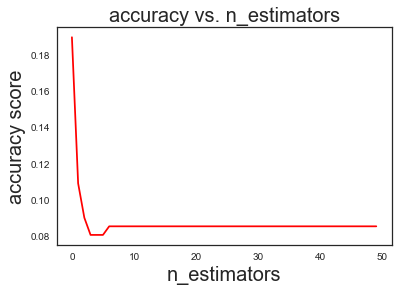

In [46]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [47]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
clf2.best_params_

{'max_depth': 19, 'max_features': 1}

In [49]:
y_pred = clf2.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.50      0.06      0.10        18
    nonbest       0.92      0.99      0.96       193

avg / total       0.88      0.91      0.88       211



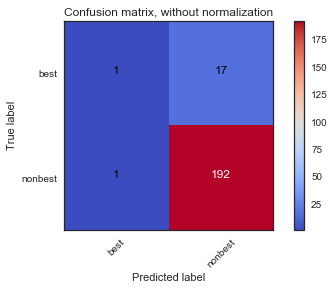

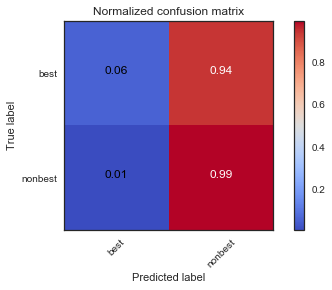

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [52]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.91


Feature ranking:
    importance   name_feature
12    0.082861        ger_inf
15    0.079458         num_vp
8     0.070101      num_coord
0     0.064724     num_tokens
6     0.063294         num_tu
5     0.061155         num_cl
11    0.059847          adj_n
9     0.058934           poss
14    0.056820          n_inf
18    0.054603         num_np
3     0.050833      num_advcl
4     0.050568      num_sents
1     0.049043        num_acl
10    0.043237        prep_ph
2     0.041439  num_acl_relcl
17    0.037292      max_depth
16    0.034575      min_depth
13    0.023894         part_n
7     0.017324        num_ctu


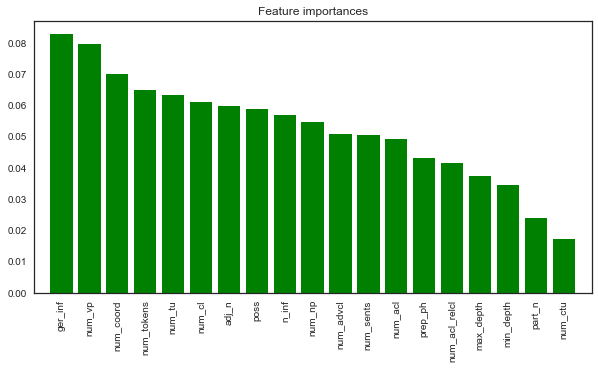

In [53]:
imp(clf2, X_df_best_non.columns)

# Разделение на три класса

In [57]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,292,7,2,7,11,32,29,3,...,2,15,1,2,28,3,6,68,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,282,4,1,7,13,31,30,1,...,5,16,0,1,30,1,7,72,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,274,8,3,5,12,27,27,0,...,7,13,1,2,28,2,10,75,nonworst,nonbest
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,243,2,1,8,12,31,31,0,...,2,15,0,0,30,2,8,67,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,361,7,3,7,18,35,35,0,...,6,19,0,2,46,3,8,102,nonworst,nonbest


In [58]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [59]:
df_three.head()

,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,aver,292,7,2,7,11,32,29,3,10,23,27,2,15,1,2,28,3,6,68
1,aver,282,4,1,7,13,31,30,1,9,23,28,5,16,0,1,30,1,7,72
2,aver,274,8,3,5,12,27,27,0,11,23,31,7,13,1,2,28,2,10,75
3,aver,243,2,1,8,12,31,31,0,3,19,31,2,15,0,0,30,2,8,67
4,aver,361,7,3,7,18,35,35,0,9,35,42,6,19,0,2,46,3,8,102


In [60]:
y = df_three.values[:, 0]

In [61]:
y

array(['aver', 'aver', 'aver', ..., 'aver', 'aver', 'aver'], dtype=object)

In [62]:
X_three = df_three.drop(['grade2'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [66]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [67]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 850 essays ) TEST ( 212 essays )
TRAIN ( 851 essays ) TEST ( 211 essays )


# Дерево решений

In [68]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_pred = clf1.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.90      0.86      0.88       184
       best       0.10      0.11      0.10        18
      worst       0.57      0.89      0.70         9

avg / total       0.82      0.80      0.81       211



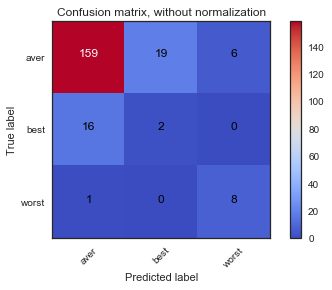

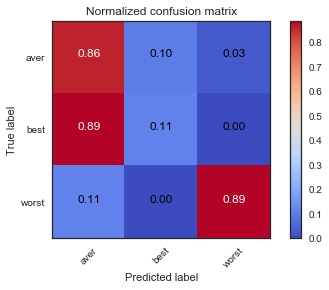

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [72]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.8


# Дерево решений с выбором лучших гиперпараметров

In [73]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
y_pred = clf1.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.88      0.90      0.89       184
       best       0.00      0.00      0.00        18
      worst       0.56      0.56      0.56         9

avg / total       0.79      0.81      0.80       211



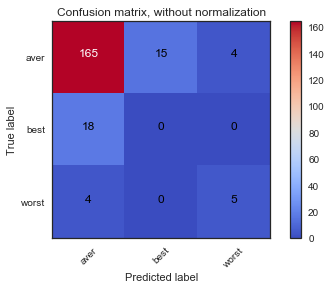

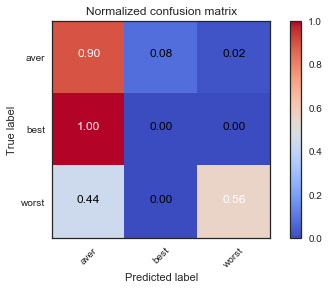

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [77]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.81


Feature ranking:
    importance   name_feature
10    0.295171        prep_ph
12    0.110403        ger_inf
17    0.073713      max_depth
15    0.056942         num_vp
16    0.053368      min_depth
3     0.052545      num_advcl
18    0.040373         num_np
8     0.037577      num_coord
6     0.035798         num_tu
9     0.035453           poss
0     0.035190     num_tokens
4     0.032517      num_sents
2     0.030219  num_acl_relcl
1     0.026641        num_acl
5     0.025063         num_cl
14    0.024140          n_inf
11    0.019594          adj_n
13    0.008214         part_n
7     0.007081        num_ctu


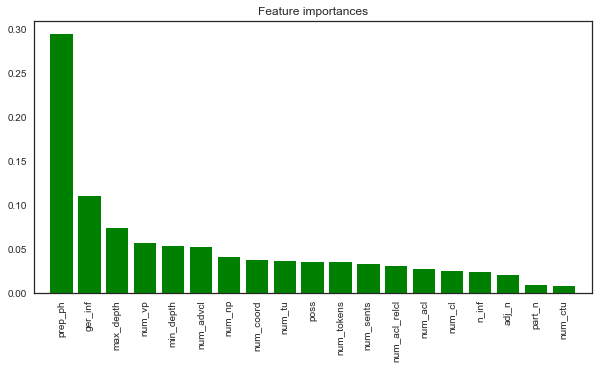

In [78]:
imp(clf1, X_three.columns)

In [79]:
clf1.best_params_

{'max_depth': 18, 'max_features': 2}

In [80]:
clf1 = DecisionTreeClassifier(max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# RandomForestClassifier

In [81]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
y_pred = clf2.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.90      0.99      0.94       184
       best       0.50      0.06      0.10        18
      worst       1.00      0.56      0.71         9

avg / total       0.87      0.90      0.86       211



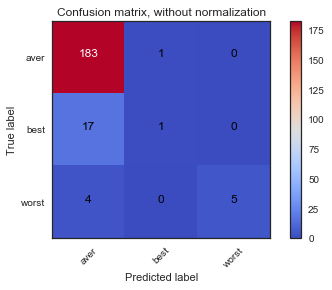

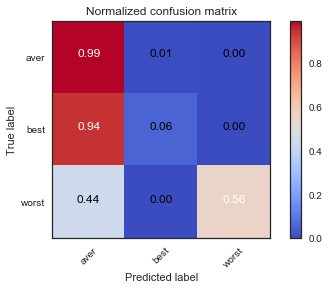

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [85]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.9


# Worst vs nonworst

In [93]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,292,7,2,7,11,32,29,3,...,2,15,1,2,28,3,6,68,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,282,4,1,7,13,31,30,1,...,5,16,0,1,30,1,7,72,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,274,8,3,5,12,27,27,0,...,7,13,1,2,28,2,10,75,nonworst,nonbest
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,243,2,1,8,12,31,31,0,...,2,15,0,0,30,2,8,67,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,361,7,3,7,18,35,35,0,...,6,19,0,2,46,3,8,102,nonworst,nonbest


In [94]:
df_worst_non = df.drop(['grade2', 'name', 'mark_best_nonbest'], axis=1)

In [95]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [96]:
y

array(['nonworst', 'nonworst', 'nonworst', ..., 'nonworst', 'nonworst',
       'nonworst'], dtype=object)

In [97]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [98]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [100]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays ):')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 530 essays ) TEST ( 532 essays ):
TRAIN ( 532 essays ) TEST ( 530 essays ):


# Дерево решений

In [101]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.97      0.94      0.96       508
      worst       0.22      0.36      0.28        22

avg / total       0.94      0.92      0.93       530



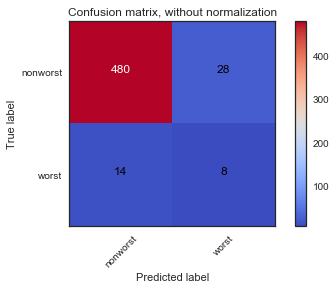

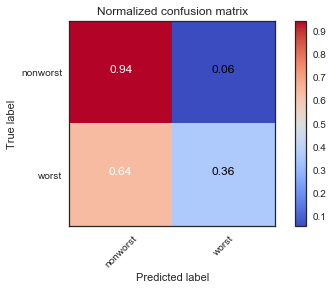

Accuracy:  0.92


In [102]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [103]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.98      0.95      0.97       508
      worst       0.32      0.55      0.41        22

avg / total       0.95      0.93      0.94       530



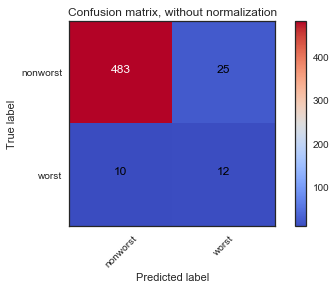

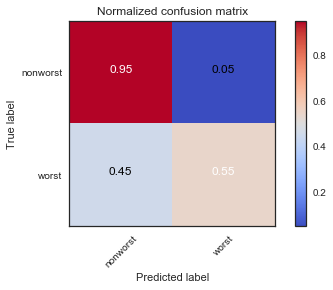

Accuracy:  0.93


In [104]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
0     0.527356     num_tokens
10    0.080336        prep_ph
7     0.063233        num_ctu
5     0.063081         num_cl
15    0.059894         num_vp
18    0.049556         num_np
11    0.041787          adj_n
4     0.033559      num_sents
12    0.033521        ger_inf
17    0.011146      max_depth
2     0.010669  num_acl_relcl
1     0.007344        num_acl
14    0.007014          n_inf
13    0.003871         part_n
8     0.003759      num_coord
6     0.003759         num_tu
3     0.000114      num_advcl
16    0.000000      min_depth
9     0.000000           poss


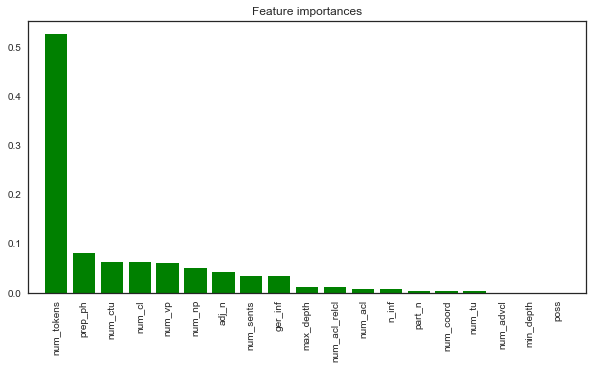

In [105]:
imp(clf1, X_worst.columns)

In [106]:
clf1.best_params_

{'max_depth': 16, 'max_features': 4}

In [107]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features'])
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=16, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

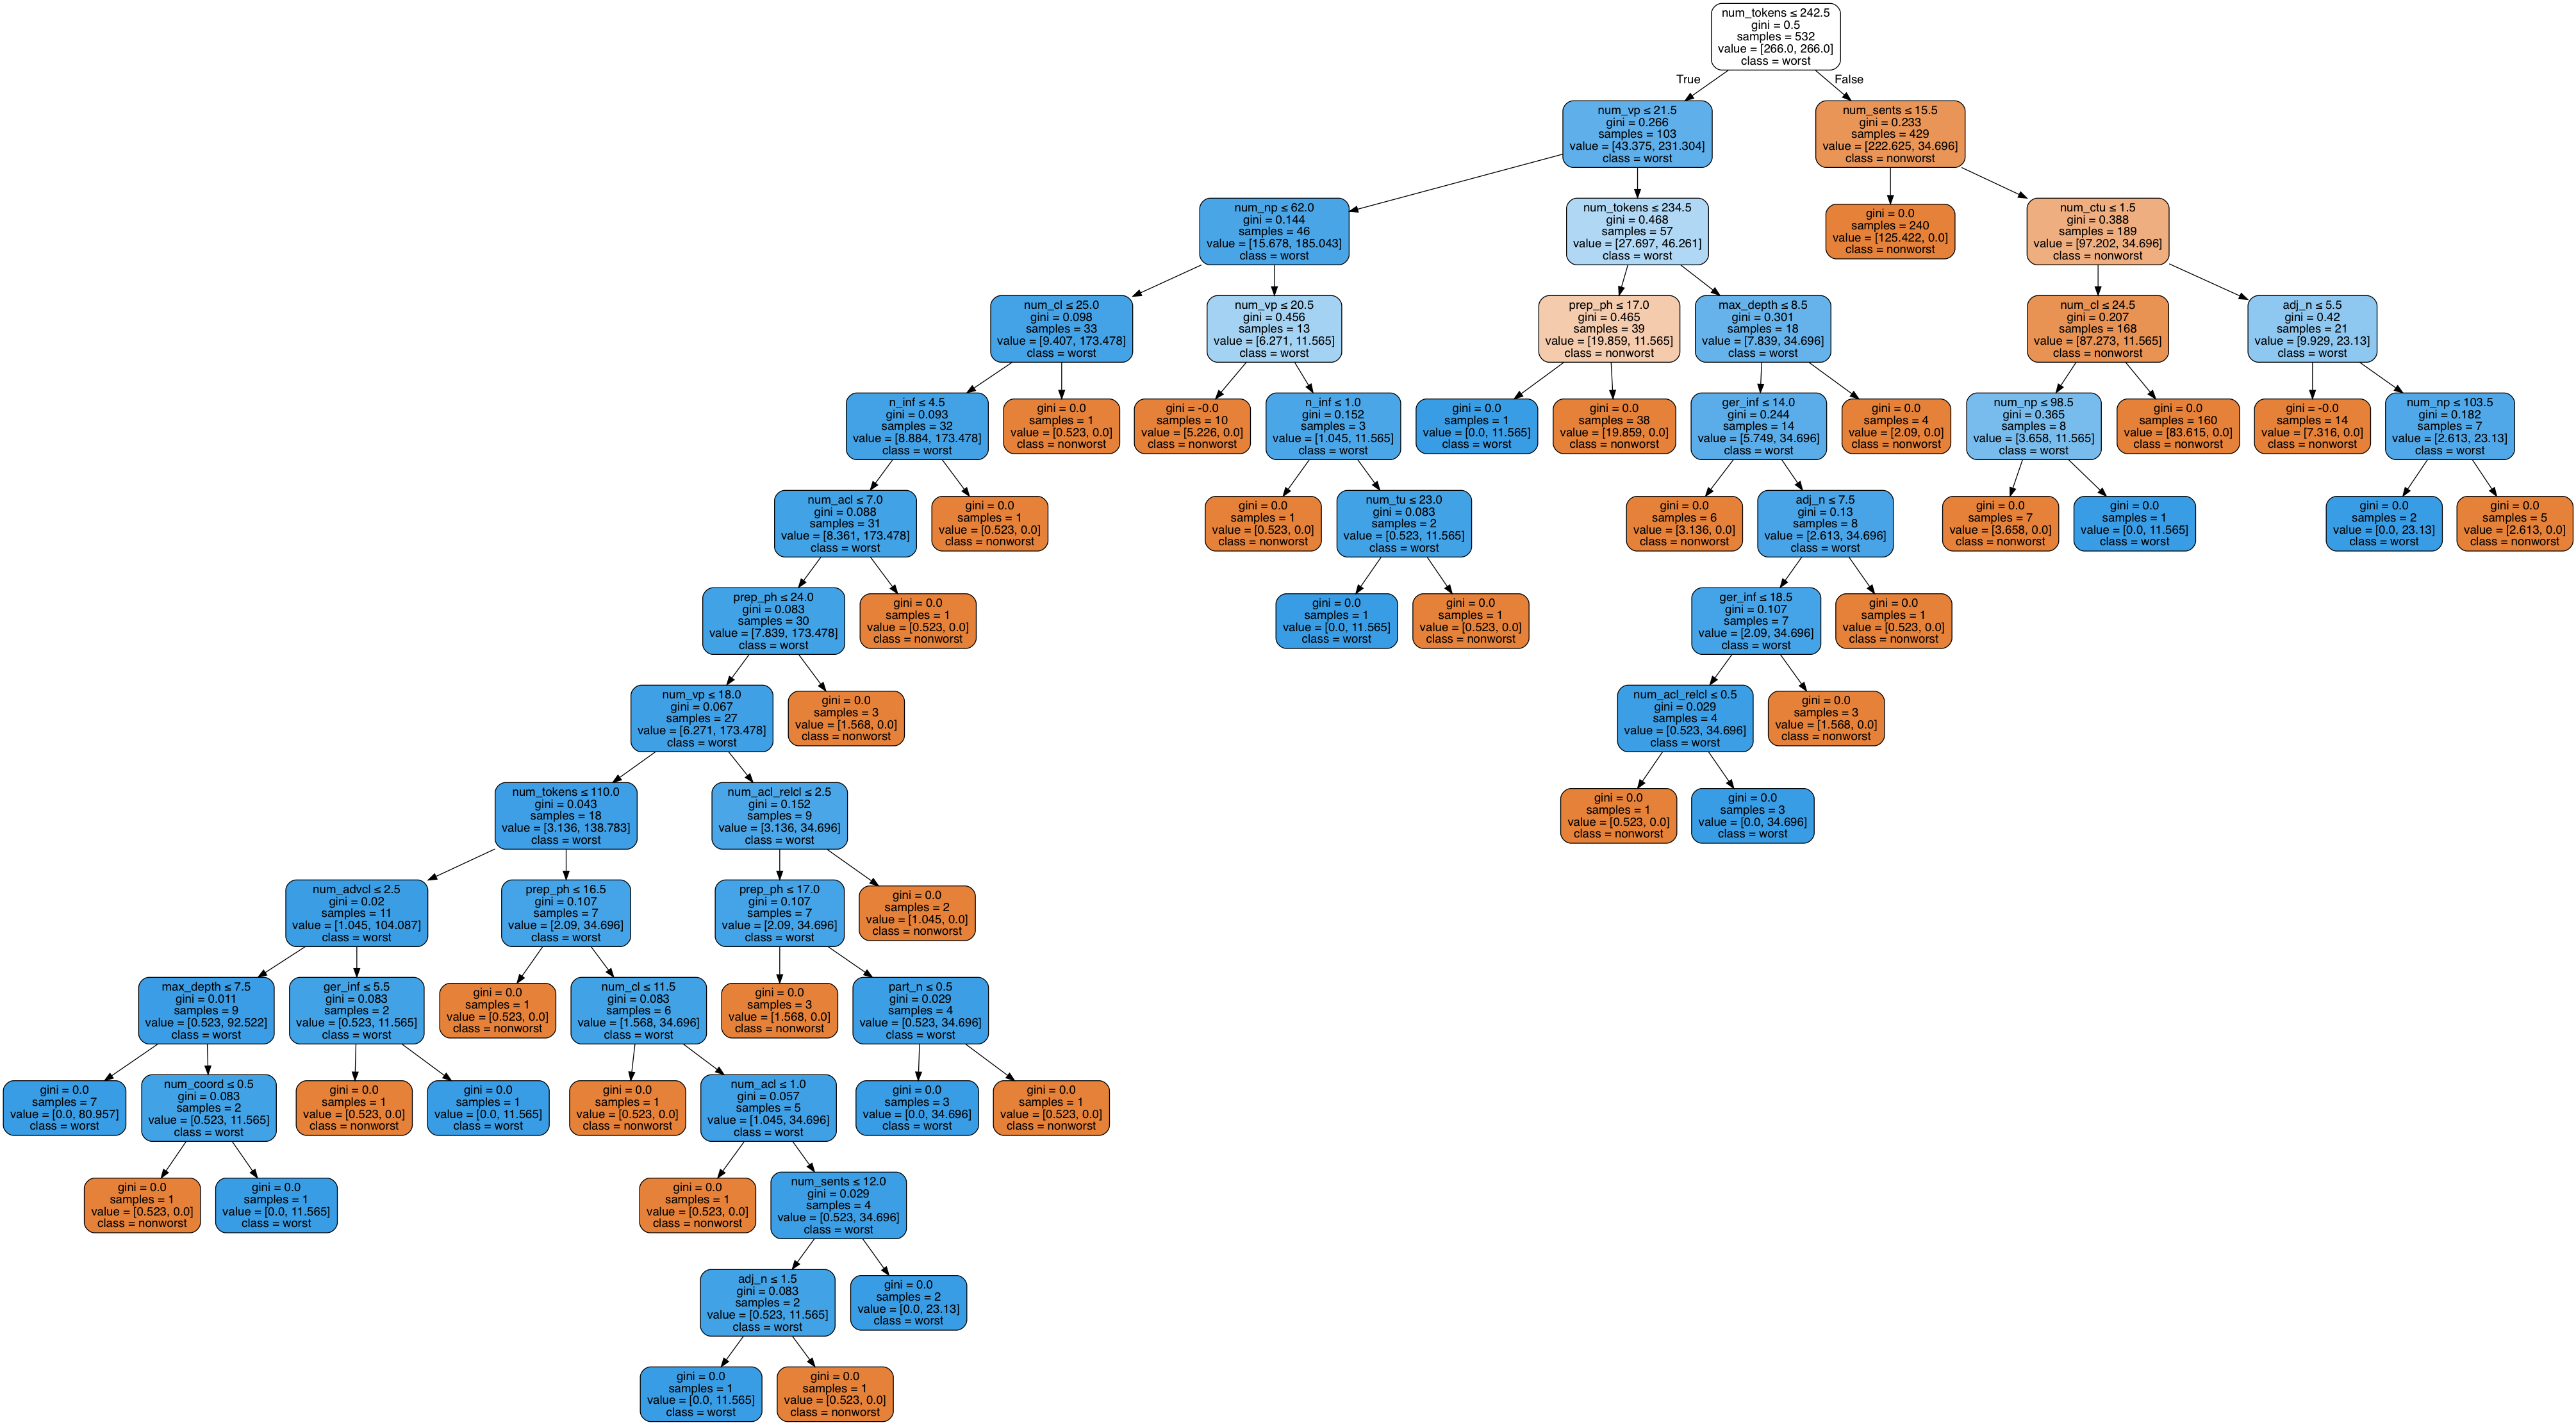

In [108]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [109]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.98      1.00      0.99       508
      worst       1.00      0.41      0.58        22

avg / total       0.98      0.98      0.97       530



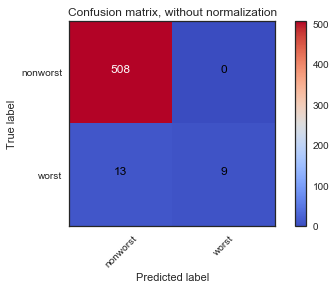

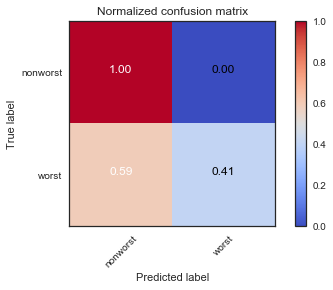

Accuracy:  0.98


In [110]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [111]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

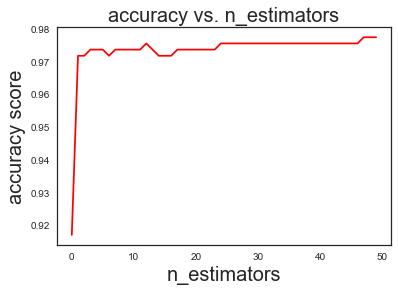

In [112]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [114]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=30, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.99      0.98      0.98       508
      worst       0.60      0.68      0.64        22

avg / total       0.97      0.97      0.97       530



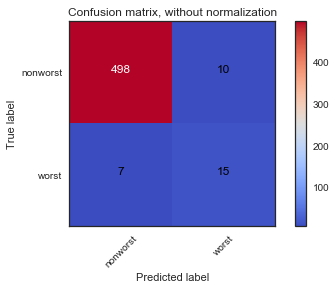

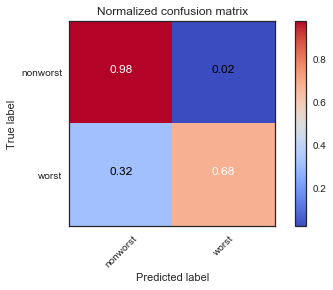

Accuracy:  0.97


In [115]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
5     0.109018         num_cl
6     0.098221         num_tu
3     0.081435      num_advcl
0     0.078240     num_tokens
18    0.064657         num_np
12    0.060506        ger_inf
9     0.059615           poss
11    0.053883          adj_n
2     0.051077  num_acl_relcl
10    0.049042        prep_ph
8     0.048270      num_coord
17    0.046152      max_depth
1     0.045258        num_acl
4     0.036297      num_sents
15    0.033139         num_vp
14    0.028067          n_inf
13    0.024391         part_n
16    0.020499      min_depth
7     0.012234        num_ctu


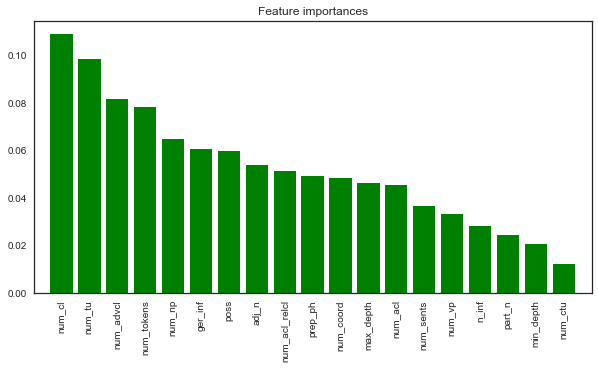

In [116]:
imp(clf2, X_worst.columns)

# Важность признаков

In [118]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Со сложными признаками

In [119]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [120]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [121]:
df.head()

,h,name,grade1,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,...,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2....,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,65,aver,4.73,32.55,24.45,33.5,25.3,26.55,...,2.636,2.091,2.455,0.182,1.364,0.091,0.182,2.545,9.36,
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2....,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,55,aver,4.62,27.21,22.22,27.75,23.0,21.69,...,2.308,1.769,2.154,0.385,1.231,0.0,0.077,2.308,6.54,
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2....,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,60,aver,5.67,27.68,20.2,26.91,20.91,22.83,...,2.25,1.917,2.583,0.583,1.083,0.083,0.167,2.333,7.42,
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2....,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,60,aver,5.25,27.64,22.32,27.73,22.0,20.25,...,2.583,1.583,2.583,0.167,1.25,0.0,0.0,2.5,4,
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2....,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,55,aver,5.11,24.91,19.14,25.06,18.94,20.06,...,1.944,1.944,2.333,0.333,1.056,0.0,0.111,2.556,6.72,


In [122]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [123]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,4.73,32.55,24.45,33.5,25.3,26.55,9.125,2.909,...,0.312,2.636,2.091,2.455,0.182,1.364,0.091,0.182,2.545,9.36
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,4.62,27.21,22.22,27.75,23.0,21.69,9.097,2.385,...,0.29,2.308,1.769,2.154,0.385,1.231,0.0,0.077,2.308,6.54
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,5.67,27.68,20.2,26.91,20.91,22.83,10.148,2.25,...,0.407,2.25,1.917,2.583,0.583,1.083,0.083,0.167,2.333,7.42
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,5.25,27.64,22.32,27.73,22.0,20.25,7.839,2.583,...,0.097,2.583,1.583,2.583,0.167,1.25,0.0,0.0,2.5,4
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,5.11,24.91,19.14,25.06,18.94,20.06,10.314,1.944,...,0.257,1.944,1.944,2.333,0.333,1.056,0.0,0.111,2.556,6.72


In [124]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [125]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,4.73,32.55,24.45,33.5,25.3,26.55,9.125,2.909,...,2.091,2.455,0.182,1.364,0.091,0.182,2.545,9.36,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,4.62,27.21,22.22,27.75,23.0,21.69,9.097,2.385,...,1.769,2.154,0.385,1.231,0.0,0.077,2.308,6.54,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,5.67,27.68,20.2,26.91,20.91,22.83,10.148,2.25,...,1.917,2.583,0.583,1.083,0.083,0.167,2.333,7.42,nonworst,nonbest
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,5.25,27.64,22.32,27.73,22.0,20.25,7.839,2.583,...,1.583,2.583,0.167,1.25,0.0,0.0,2.5,4,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,5.11,24.91,19.14,25.06,18.94,20.06,10.314,1.944,...,1.944,2.333,0.333,1.056,0.0,0.111,2.556,6.72,nonworst,nonbest


In [126]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

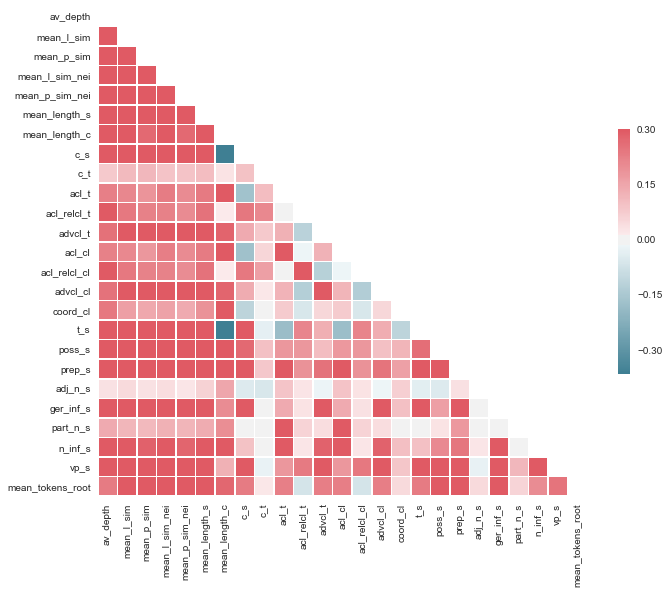

In [127]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

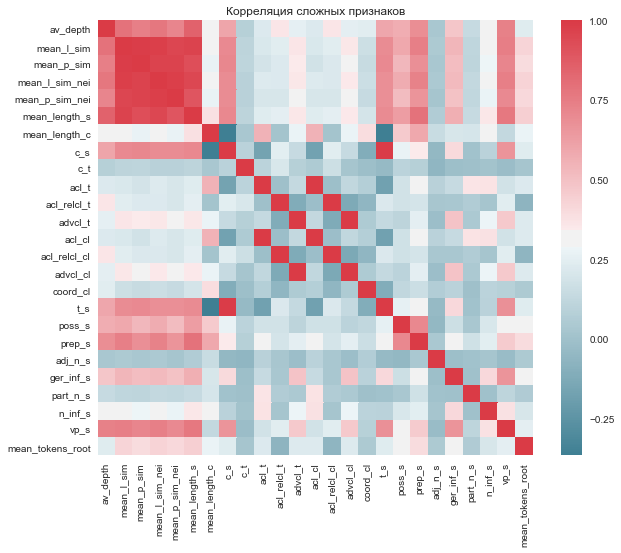

In [128]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция сложных признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_complex.png')

In [129]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays ):')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 849 essays ) TEST ( 213 essays ):
TRAIN ( 849 essays ) TEST ( 213 essays ):
TRAIN ( 849 essays ) TEST ( 213 essays ):
TRAIN ( 850 essays ) TEST ( 212 essays ):
TRAIN ( 851 essays ) TEST ( 211 essays ):


# Дерево решений

             precision    recall  f1-score   support

       best       0.10      0.17      0.12        18
    nonbest       0.92      0.86      0.89       193

avg / total       0.85      0.80      0.82       211



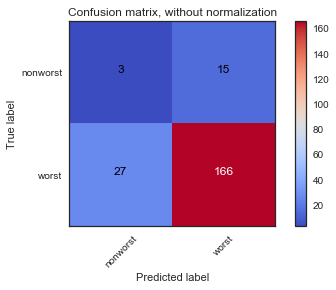

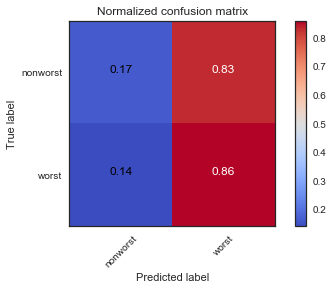

Accuracy:  0.8


In [130]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
11    0.126726           advcl_t
22    0.069502           n_inf_s
24    0.066352  mean_tokens_root
3     0.063385    mean_l_sim_nei
12    0.061350            acl_cl
19    0.058881           adj_n_s
4     0.053249    mean_p_sim_nei
6     0.049738     mean_length_c
7     0.048778               c_s
5     0.042149     mean_length_s
2     0.041630        mean_p_sim
0     0.040738          av_depth
18    0.034758            prep_s
20    0.033992         ger_inf_s
13    0.031741      acl_relcl_cl
14    0.027907          advcl_cl
10    0.026385       acl_relcl_t
21    0.024985          part_n_s
9     0.021381             acl_t
1     0.020990        mean_l_sim
16    0.019489               t_s
17    0.016278            poss_s
23    0.011796              vp_s
15    0.004511          coord_cl
8     0.003307               c_t


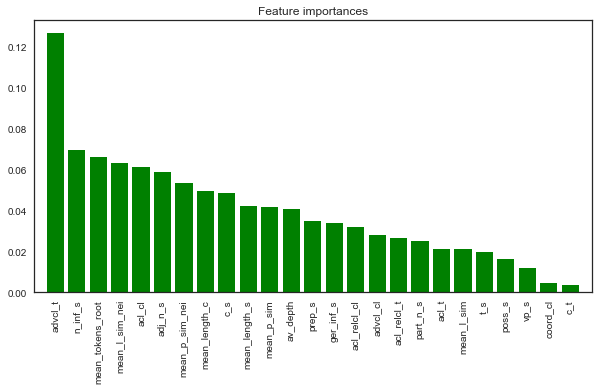

In [131]:
imp(clf1, X_df_best_non.columns)

In [132]:
clf1.best_params_

{'max_depth': 25, 'max_features': 3}

In [133]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=25, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# RandomForestClassifier

In [134]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

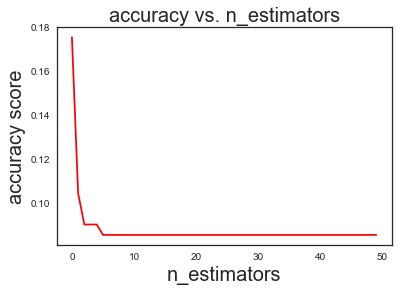

In [135]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [136]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 25), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.00      0.00      0.00        18
    nonbest       0.91      0.99      0.95       193

avg / total       0.84      0.91      0.87       211



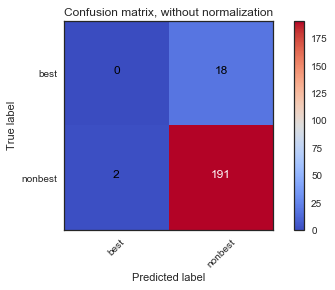

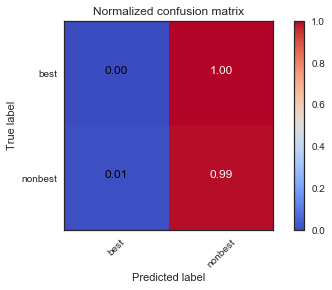

Accuracy:  0.91


In [137]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
24    0.054947  mean_tokens_root
18    0.054891            prep_s
17    0.053764            poss_s
2     0.052169        mean_p_sim
4     0.052104    mean_p_sim_nei
1     0.047783        mean_l_sim
14    0.047126          advcl_cl
6     0.043265     mean_length_c
13    0.041650      acl_relcl_cl
23    0.041620              vp_s
15    0.041211          coord_cl
22    0.041029           n_inf_s
7     0.040119               c_s
12    0.039834            acl_cl
9     0.039513             acl_t
5     0.037103     mean_length_s
10    0.036910       acl_relcl_t
19    0.035683           adj_n_s
0     0.034219          av_depth
3     0.032501    mean_l_sim_nei
11    0.031369           advcl_t
21    0.028728          part_n_s
16    0.027210               t_s
20    0.026887         ger_inf_s
8     0.018364               c_t


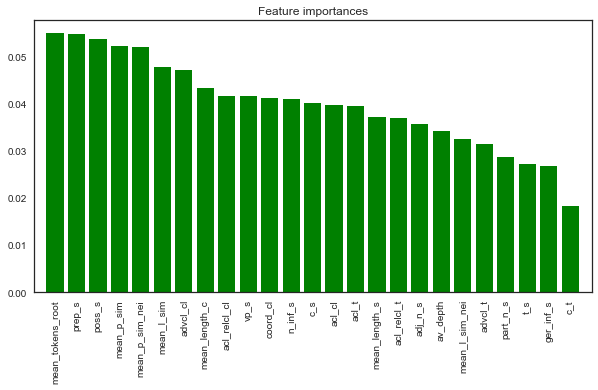

In [138]:
imp(clf2, X_df_best_non.columns)

# Всё в куче

In [139]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [140]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [141]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [142]:
df2[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [143]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [144]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,4.73,32.55,24.45,33.5,25.3,26.55,9.125,2.909,...,0.312,2.636,2.091,2.455,0.182,1.364,0.091,0.182,2.545,9.36
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,4.62,27.21,22.22,27.75,23.0,21.69,9.097,2.385,...,0.29,2.308,1.769,2.154,0.385,1.231,0.0,0.077,2.308,6.54
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,5.67,27.68,20.2,26.91,20.91,22.83,10.148,2.25,...,0.407,2.25,1.917,2.583,0.583,1.083,0.083,0.167,2.333,7.42
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,5.25,27.64,22.32,27.73,22.0,20.25,7.839,2.583,...,0.097,2.583,1.583,2.583,0.167,1.25,0.0,0.0,2.5,4
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,5.11,24.91,19.14,25.06,18.94,20.06,10.314,1.944,...,0.257,1.944,1.944,2.333,0.333,1.056,0.0,0.111,2.556,6.72


In [145]:
df2 = df2.drop(['h','nan', 'grade1', 'grade2', 'name'], axis=1)

In [146]:
df2.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,292,7,2,7,11,32,29,3,10,23,27,2,15,1,2,28,3,6,68
1,282,4,1,7,13,31,30,1,9,23,28,5,16,0,1,30,1,7,72
2,274,8,3,5,12,27,27,0,11,23,31,7,13,1,2,28,2,10,75
3,243,2,1,8,12,31,31,0,3,19,31,2,15,0,0,30,2,8,67
4,361,7,3,7,18,35,35,0,9,35,42,6,19,0,2,46,3,8,102


In [147]:
result = pd.concat([df, df2], axis=1)

In [148]:
result.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,aver,4.73,32.55,24.45,33.5,25.3,26.55,9.125,2.909,...,23,27,2,15,1,2,28,3,6,68
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,aver,4.62,27.21,22.22,27.75,23.0,21.69,9.097,2.385,...,23,28,5,16,0,1,30,1,7,72
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,aver,5.67,27.68,20.2,26.91,20.91,22.83,10.148,2.25,...,23,31,7,13,1,2,28,2,10,75
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,aver,5.25,27.64,22.32,27.73,22.0,20.25,7.839,2.583,...,19,31,2,15,0,0,30,2,8,67
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,aver,5.11,24.91,19.14,25.06,18.94,20.06,10.314,1.944,...,35,42,6,19,0,2,46,3,8,102


In [149]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

result['mark_worst_nonworst'] = result.apply(worst_non, axis=1)
result['mark_best_nonbest'] = result.apply(best_non, axis=1)

In [150]:
df_best_non = result.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

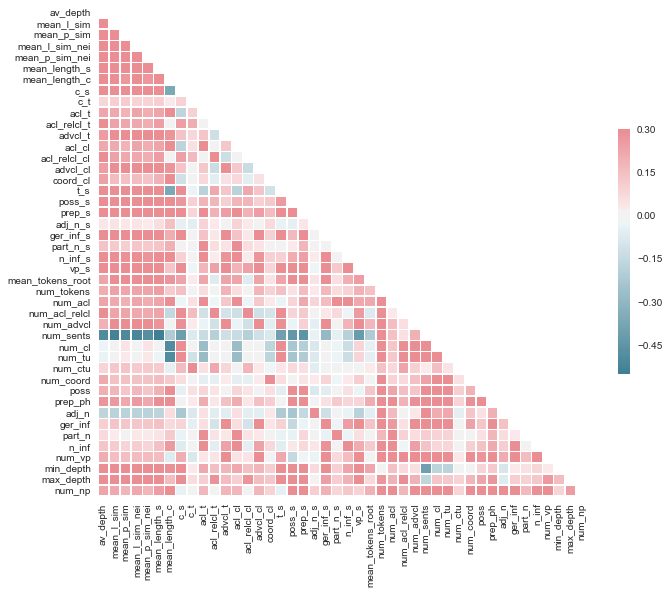

In [151]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

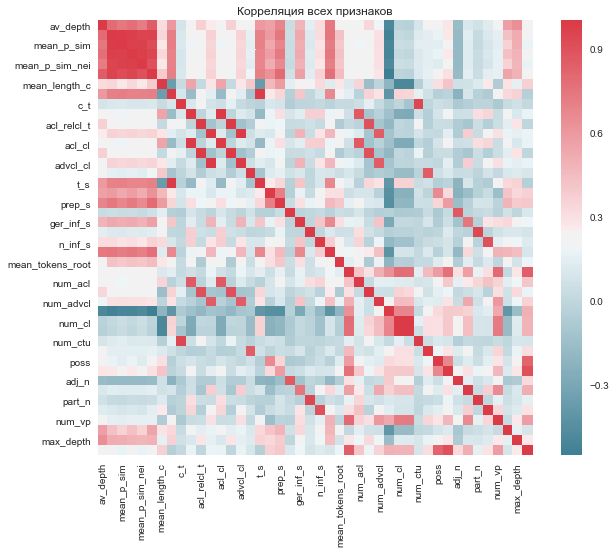

In [152]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция всех признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_all.png')

In [154]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 849 essays ) TEST ( 213 essays )
TRAIN ( 850 essays ) TEST ( 212 essays )
TRAIN ( 851 essays ) TEST ( 211 essays )


# Дерево решений

             precision    recall  f1-score   support

       best       0.05      0.06      0.05        18
    nonbest       0.91      0.90      0.90       193

avg / total       0.84      0.82      0.83       211



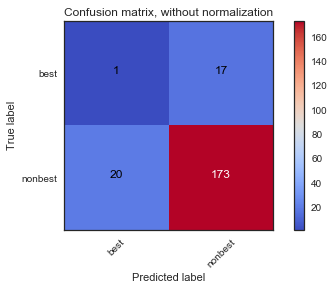

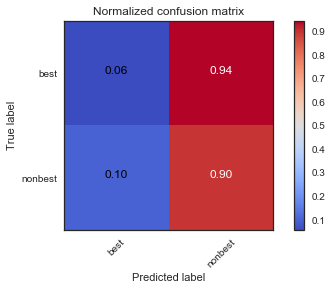

Accuracy:  0.82


In [156]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
14    0.110747          advcl_cl
40    0.088408            num_vp
37    0.074197           ger_inf
12    0.072970            acl_cl
20    0.061154         ger_inf_s
6     0.059717     mean_length_c
1     0.055758        mean_l_sim
4     0.053742    mean_p_sim_nei
17    0.045730            poss_s
18    0.038300            prep_s
21    0.033125          part_n_s
9     0.028456             acl_t
28    0.025384         num_advcl
3     0.025224    mean_l_sim_nei
22    0.024624           n_inf_s
13    0.022575      acl_relcl_cl
11    0.016310           advcl_t
29    0.014959         num_sents
27    0.014721     num_acl_relcl
24    0.014650  mean_tokens_root
8     0.014384               c_t
25    0.014124        num_tokens
35    0.013144           prep_ph
39    0.012702             n_inf
19    0.012555           adj_n_s
33    0.009265         num_coord
31    0.007878            num_tu
23    0.006938              vp_s
26    0.006700           n

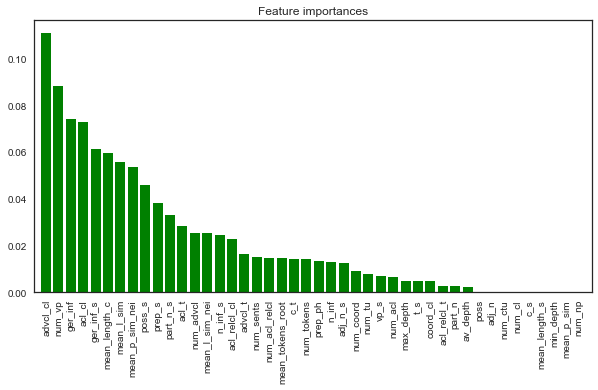

In [157]:
imp(clf1, X_df_best_non.columns)

# Лес решений

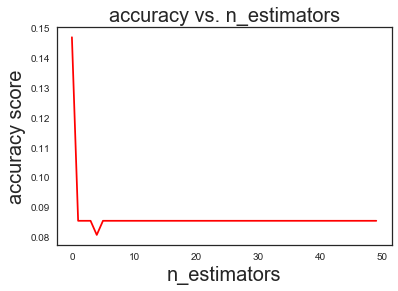

In [158]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [159]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 44), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.50      0.11      0.18        18
    nonbest       0.92      0.99      0.95       193

avg / total       0.89      0.91      0.89       211



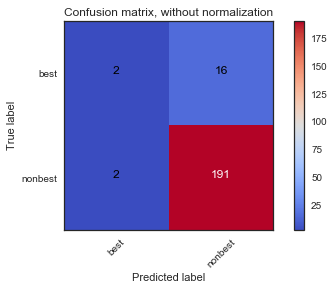

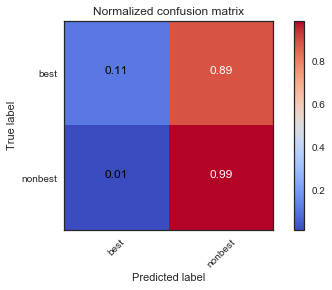

Accuracy:  0.91


In [160]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
14    0.060376          advcl_cl
11    0.054693           advcl_t
25    0.054408        num_tokens
24    0.050290  mean_tokens_root
37    0.045574           ger_inf
43    0.039457            num_np
20    0.038656         ger_inf_s
4     0.036180    mean_p_sim_nei
40    0.035554            num_vp
31    0.029219            num_tu
0     0.028615          av_depth
19    0.028384           adj_n_s
6     0.028270     mean_length_c
23    0.027112              vp_s
28    0.025570         num_advcl
9     0.025189             acl_t
22    0.023468           n_inf_s
2     0.023147        mean_p_sim
17    0.022906            poss_s
29    0.022756         num_sents
18    0.020212            prep_s
12    0.019371            acl_cl
30    0.019320            num_cl
1     0.018848        mean_l_sim
33    0.017817         num_coord
34    0.016355              poss
15    0.015486          coord_cl
35    0.014632           prep_ph
36    0.014190            

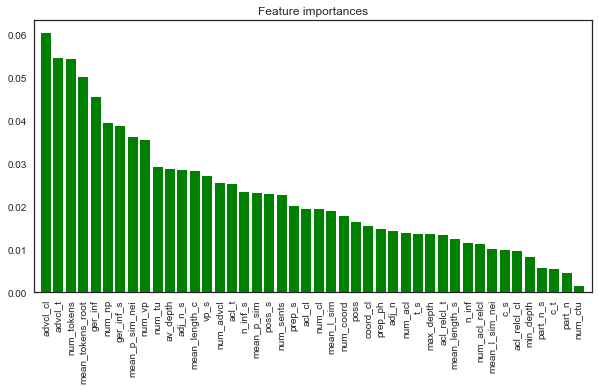

In [161]:
imp(clf2, X_df_best_non.columns)